In [20]:
from glob import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from sklearn.metrics import f1_score

In [2]:
!unzip mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: mnist/train/5/2413.png  
  inflating: mnist/train/5/2445.png  
  inflating: mnist/train/5/2452.png  
  inflating: mnist/train/5/2460.png  
  inflating: mnist/train/5/2476.png  
  inflating: mnist/train/5/2487.png  
  inflating: mnist/train/5/2515.png  
  inflating: mnist/train/5/2518.png  
  inflating: mnist/train/5/2525.png  
  inflating: mnist/train/5/2526.png  
  inflating: mnist/train/5/2540.png  
  inflating: mnist/train/5/2545.png  
  inflating: mnist/train/5/2546.png  
  inflating: mnist/train/5/2554.png  
  inflating: mnist/train/5/2556.png  
  inflating: mnist/train/5/2558.png  
  inflating: mnist/train/5/2559.png  
  inflating: mnist/train/5/2569.png  
  inflating: mnist/train/5/2573.png  
  inflating: mnist/train/5/2574.png  
  inflating: mnist/train/5/2581.png  
  inflating: mnist/train/5/2586.png  
  inflating: mnist/train/5/2597.png  
  inflating: mnist/train/5/2604.png  
  inflating: mnist/train/5/2606.png  

In [42]:
train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

train_files[0]

'./mnist/train/0/3565.png'

In [43]:
np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

# Primer caso

In [44]:
#--- Cargamos los datos de entrenamiento en listas
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))

In [45]:
#--- Cargamos los datos de validación en listas
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )
  

In [46]:
#--- Cargamos los datos de testeo en listas
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

In [74]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [75]:
#--- Convertimos las listas de datos a tensores de torch
# 10% son 600 objetos
# 20% son 1200 objetos
# 50% son 3000 objetos
# 80% son 4800 objetos
# 100% son 6000 objetos
import torch
from torch.autograd import Variable

X_train10 = Variable(torch.from_numpy(np.array(X_train[0:590]))).float()
Y_train10 = Variable(torch.from_numpy(np.array(Y_train[0:590]))).long()

X_train20 = Variable(torch.from_numpy(np.array(X_train[0:1190]))).float()
Y_train20 = Variable(torch.from_numpy(np.array(Y_train[0:1190]))).long()

X_train50 = Variable(torch.from_numpy(np.array(X_train[0:2990]))).float()
Y_train50 = Variable(torch.from_numpy(np.array(Y_train[0:2990]))).long()

X_train80 = Variable(torch.from_numpy(np.array(X_train[0:4790]))).float()
Y_train80 = Variable(torch.from_numpy(np.array(Y_train[0:4790]))).long()

X_train100 = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train100 = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

print(X_train10.data.size())
print(X_train20.data.size())
print(X_train50.data.size())
print(X_train80.data.size())
print(X_train100.data.size())

torch.Size([590, 28, 28])
torch.Size([1190, 28, 28])
torch.Size([2990, 28, 28])
torch.Size([4790, 28, 28])
torch.Size([6000, 28, 28])


## Caso 10%

In [76]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train10.view(X_train10.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train10)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train10,Y_pred, average='macro') )
  
  acc = sum(Y_train10 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

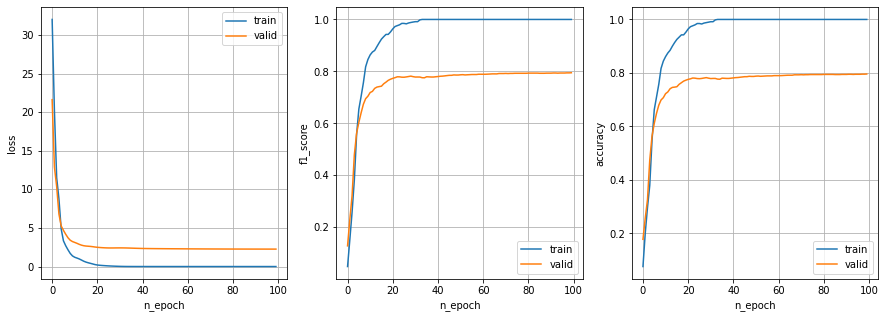

In [77]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [78]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 1.703754186630249, f1: 0.837250138377404, acc: 0.8387096524238586


## Caso 20%


In [79]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [80]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train20.view(X_train20.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train20)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train20,Y_pred, average='macro') )
  
  acc = sum(Y_train20 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

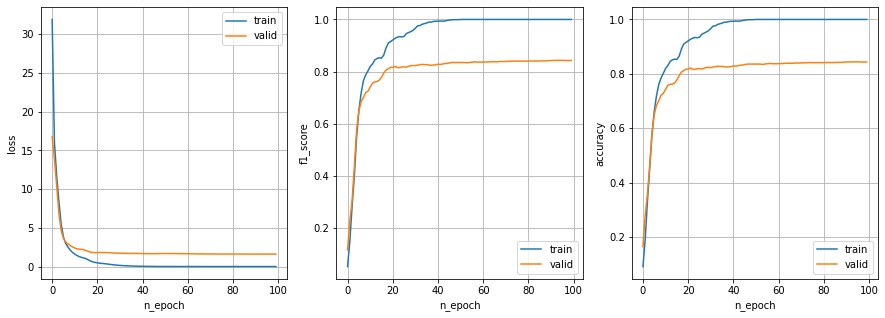

In [81]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [82]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 1.1770395040512085, f1: 0.8785321575335686, acc: 0.8790322542190552


## Caso 50%

In [83]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [84]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train50.view(X_train50.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train50)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train50,Y_pred, average='macro') )
  
  acc = sum(Y_train50 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

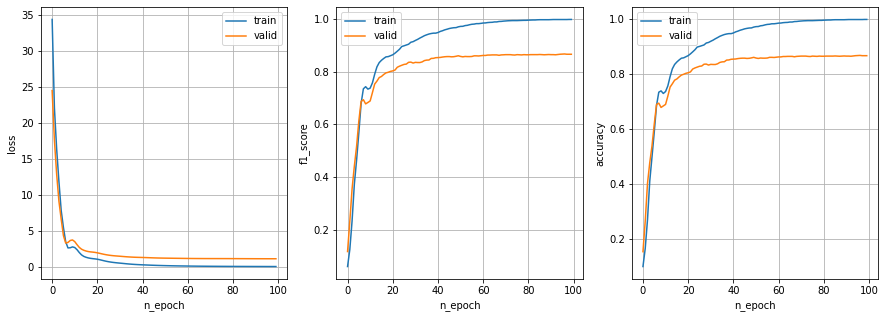

In [85]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [86]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.9352914690971375, f1: 0.8839625688264968, acc: 0.8840726017951965


## Caso 80%

In [87]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [88]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train80.view(X_train80.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train80)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train80,Y_pred, average='macro') )
  
  acc = sum(Y_train80 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

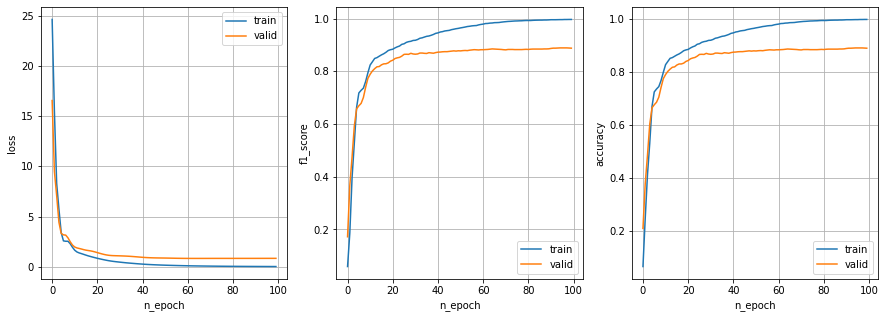

In [89]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [90]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.5714289546012878, f1: 0.913228414083686, acc: 0.913306474685669


## Caso 100%

In [91]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [92]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train100.view(X_train100.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train100)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train100,Y_pred, average='macro') )
  
  acc = sum(Y_train100 == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

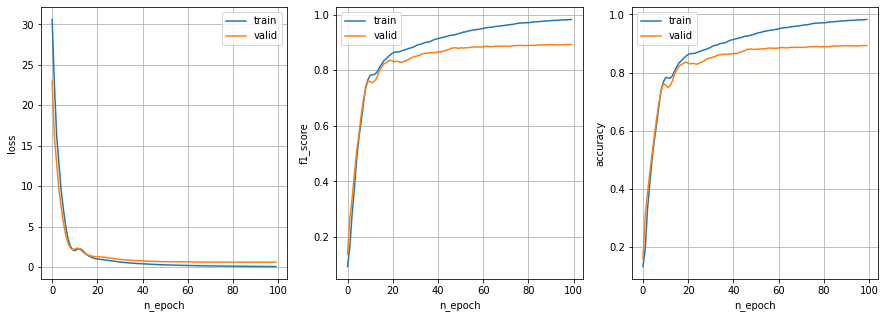

In [93]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

In [94]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test.view(X_test.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.5584078431129456, f1: 0.8895769885723499, acc: 0.8901209831237793


Podemos ver que los puntajes van aumentando con respecto que vamos aumento el porcentaje de los datos de entrenamiento. También vemos que el loss disminuye con respecto a la cantidad de datos de entrenamiento. Claramente se puede ver que mientras mayor sea la cantidad de datos mejor puede entrenar nuestra red neuronal. En esta cantidad de datos no veo el punto donde deja de tener sentido de darle muchos datos a la red. Por lo que mientras más datos se le pueda dar es mejor

# Segunda parte

In [95]:
#--- Convertimos las listas de datos a tensores de torch
# 10% son 99 objetos
# 20% son 198 objetos
# 50% son 496 objetos
# 80% son 793 objetos
# 100% son 992 objetos
import torch
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test10 = Variable(torch.from_numpy(np.array(X_test[0:98]))).float()
Y_test10 = Variable(torch.from_numpy(np.array(Y_test[0:98]))).long()

X_test20 = Variable(torch.from_numpy(np.array(X_test[0:197]))).float()
Y_test20 = Variable(torch.from_numpy(np.array(Y_test[0:197]))).long()

X_test50 = Variable(torch.from_numpy(np.array(X_test[0:495]))).float()
Y_test50 = Variable(torch.from_numpy(np.array(Y_test[0:495]))).long()

X_test80 = Variable(torch.from_numpy(np.array(X_test[0:792]))).float()
Y_test80 = Variable(torch.from_numpy(np.array(Y_test[0:792]))).long()

X_test100 = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test100 = Variable(torch.from_numpy(np.array(Y_test))).long()


print(X_test10.data.size())
print(X_test20.data.size())
print(X_test50.data.size())
print(X_test80.data.size())
print(X_test100.data.size())

torch.Size([98, 28, 28])
torch.Size([197, 28, 28])
torch.Size([495, 28, 28])
torch.Size([792, 28, 28])
torch.Size([992, 28, 28])


In [96]:
#--- Definimos una ANN con dos capas ocultas lineales de 100 neuronas

input_dim = 28*28
out_dim = 10
hidden = 100

model = torch.nn.Sequential(
  torch.nn.Linear(input_dim, hidden),
  torch.nn.ReLU(),       
  torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

In [97]:
from sklearn.metrics import f1_score # Nueva métrica (La revisaremos la próóxima sesión)

#-- Número de épocas
n_epoch = 100

#-- Listas de evaluación entrenamiento
loss_train = []
f1_train = []
acc_train = []

#-- Listas de evaluación validación
loss_valid = []
f1_valid = []
acc_valid = []

#-- Entrenamineto de la ANN
for epoch in range(n_epoch):
  model.train()
  
  Xtr = X_train.view(X_train.size(0), -1)
  Y_pred = model(Xtr)

  loss = criterion(Y_pred,Y_train)
  loss_train.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
  
  acc = sum(Y_train == Y_pred)/len(Y_pred)
  acc_train.append(acc)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

  model.eval()
  Xvl = X_valid.view(X_valid.size(0), -1)
  Y_pred = model(Xvl)  
  loss = criterion(Y_pred,Y_valid)
  loss_valid.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

  acc = sum(Y_valid == Y_pred)/len(Y_pred)
  acc_valid.append(acc)

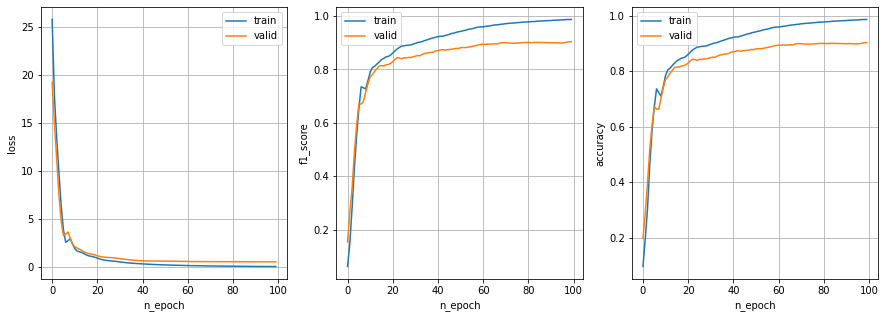

In [98]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(range(n_epoch), loss_train, label='train')
plt.plot(range(n_epoch), loss_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.subplot(1,3,2)
plt.plot(range(n_epoch), f1_train, label='train')
plt.plot(range(n_epoch), f1_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('f1_score')
plt.legend()
plt.grid()
plt.subplot(1,3,3)
plt.plot(range(n_epoch), acc_train, label='train')
plt.plot(range(n_epoch), acc_valid, label='valid')
plt.xlabel('n_epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

plt.savefig('./curves_ok.png', bbox_inches='tight')
plt.show()

## Caso 10%

In [99]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test10.view(X_test10.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test10)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test10, Y_pred, average='macro')

acc = sum(Y_test10 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.5083313584327698, f1: 0.8915369012326417, acc: 0.8877550959587097


## caso 20%

In [101]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test20.view(X_test20.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test20)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test20, Y_pred, average='macro')

acc = sum(Y_test20 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.47239014506340027, f1: 0.8964330260204108, acc: 0.893401026725769


## Caso 50%

In [102]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test50.view(X_test50.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test50)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test50, Y_pred, average='macro')

acc = sum(Y_test50 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.5585505962371826, f1: 0.8819896529390799, acc: 0.8828282952308655


## Caso 80%

In [103]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test50.view(X_test50.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test50)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test50, Y_pred, average='macro')

acc = sum(Y_test50 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.5585505962371826, f1: 0.8819896529390799, acc: 0.8828282952308655


## Caso 80%



In [105]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test80.view(X_test80.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test80)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test80, Y_pred, average='macro')

acc = sum(Y_test80 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.5668669939041138, f1: 0.8854499332287669, acc: 0.8863636255264282


## Caso 100%

In [106]:
#-- Evaluamos el modelo entrenado con el set de testeo

model.eval()

Xts = X_test100.view(X_test100.size(0), -1)
Y_pred = model(Xts)  
loss = criterion(Y_pred,Y_test100)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test100, Y_pred, average='macro')

acc = sum(Y_test100 == Y_pred)/len(Y_pred)

print('loss: {}, f1: {}, acc: {}'.format(loss.item(), f1, acc))

loss: 0.54299396276474, f1: 0.89087717391649, acc: 0.8911290168762207


Podemos ver que mediante va creciendo el tamanño del set de testeo los errores van creciendo. Lo que nos indica que si tenemos un amplio set de testeo podemos encontrar más claramente si nuestra red nueronal comete errores. Lo cual nos dice que es bueno tener muchos datos de testeo porque de esa manera podremos saber el rendimiento real de nuestra red nueronal